<a href="https://colab.research.google.com/github/ishnt/Data_science_stuff/blob/main/Regression_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [57]:
df=fetch_california_housing()

In [58]:
x=pd.DataFrame(df.data,columns=df.feature_names)

In [59]:
x.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [60]:
y=pd.DataFrame(df.target,columns=['target'])

In [61]:
x.drop(['Latitude','Longitude'],axis=1,inplace=True)

In [62]:
x_train_full, x_test, y_train_full, y_test = train_test_split(x, y, test_size=0.30, random_state=42)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_full, y_train_full, test_size=0.20, random_state=42)

In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU
from tensorflow.keras.layers import Dropout

In [64]:
classifier=Sequential()

In [65]:
classifier.add(Dense(units=6,activation='relu'))

In [66]:
classifier.add(Dense(units=30,activation='relu'))

In [67]:
classifier.add(Dense(units=10,activation='relu'))

In [68]:
classifier.add(Dense(units=5,activation='relu'))

In [69]:
classifier.add(Dense(units=1,activation='linear'))

In [70]:
classifier.compile(loss='mse',optimizer='sgd')

In [71]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)
x_valid=scaler.transform(x_valid)


In [72]:
history=classifier.fit(x_train,y_train,epochs=25,validation_data=(x_valid,y_valid))

Epoch 1/25
362/362 [==============================] - 2s 3ms/step - loss: 0.7958 - val_loss: 0.6829
Epoch 2/25
362/362 [==============================] - 1s 2ms/step - loss: 0.5483 - val_loss: 1.8804
Epoch 3/25
362/362 [==============================] - 1s 2ms/step - loss: 0.5836 - val_loss: 0.5196
Epoch 4/25
362/362 [==============================] - 1s 4ms/step - loss: 0.5047 - val_loss: 0.4986
Epoch 5/25
362/362 [==============================] - 1s 3ms/step - loss: 0.4920 - val_loss: 0.4893
Epoch 6/25
362/362 [==============================] - 1s 2ms/step - loss: 0.4789 - val_loss: 0.4760
Epoch 7/25
362/362 [==============================] - 1s 2ms/step - loss: 0.4702 - val_loss: 0.4685
Epoch 8/25
362/362 [==============================] - 1s 2ms/step - loss: 0.4635 - val_loss: 0.4721
Epoch 9/25
362/362 [==============================] - 1s 3ms/step - loss: 0.4558 - val_loss: 0.4695
Epoch 10/25
362/362 [==============================] - 1s 3ms/step - loss: 0.4511 - val_loss: 0.4546

<Axes: >

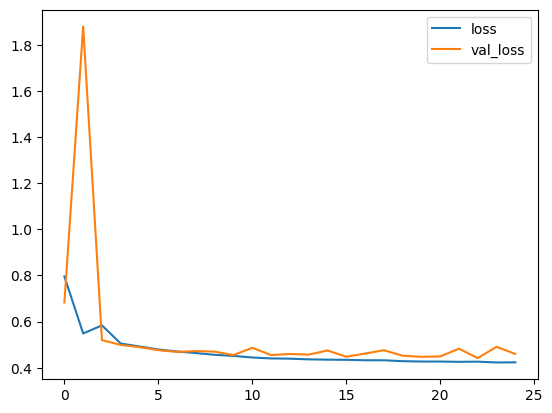

In [73]:
pd.DataFrame(history.history).plot()

In [74]:
classifier.evaluate(x_test,y_test)

194/194 [==============================] - 1s 3ms/step - loss: 0.4511


0.4511089324951172

In [76]:
classifier.predict(x_test)

194/194 [==============================] - 1s 3ms/step


array([[0.9534004],
       [1.3621144],
       [4.129975 ],
       ...,
       [2.524543 ],
       [1.227749 ],
       [1.8616738]], dtype=float32)